# **Machine Learning App in R**

## **Brian J. Ault**

### **Load The Data**

In [1]:
library(caret)
library(ggplot2)
library(lattice)

Loading required package: ggplot2

Loading required package: lattice



In [2]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)

In [3]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")
dataset$Species = as.factor(dataset$Species)

### **Create a Validation Dataset**

In [4]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

Warning message in createDataPartition(dataset$Species, p = 0.8, list = FALSE):
“Some classes have a single record ( name ) and these will be selected for the sample”


### **Summarize Dataset**

In [5]:
# dimensions of dataset
dim(dataset)

[1] 121   5

In [6]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
 "character"  "character"  "character"  "character"     "factor"

In [7]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<chr>,<chr>,<chr>,<chr>,<fct>
1,sepal_length,sepal_width,petal_length,petal_width,name
2,5.1,3.5,1.4,0.2,setosa
3,4.9,3.0,1.4,0.2,setosa
5,4.6,3.1,1.5,0.2,setosa
6,5.0,3.6,1.4,0.2,setosa
8,4.6,3.4,1.4,0.3,setosa


In [8]:
# Example data with an unwanted level 'name'
dataset <- data.frame(
  Species = factor(c("setosa", "versicolor", "virginica"))
)
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [9]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,1,33.33333
versicolor,1,33.33333
virginica,1,33.33333


In [10]:
# summarize attribute distributions
summary(dataset)

       Species 
 setosa    :1  
 versicolor:1  
 virginica :1  

### **Visualize Dataset**

In [11]:
# split input and output
x <- dataset[, -ncol(dataset)]
y <- as.factor(dataset$Species)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


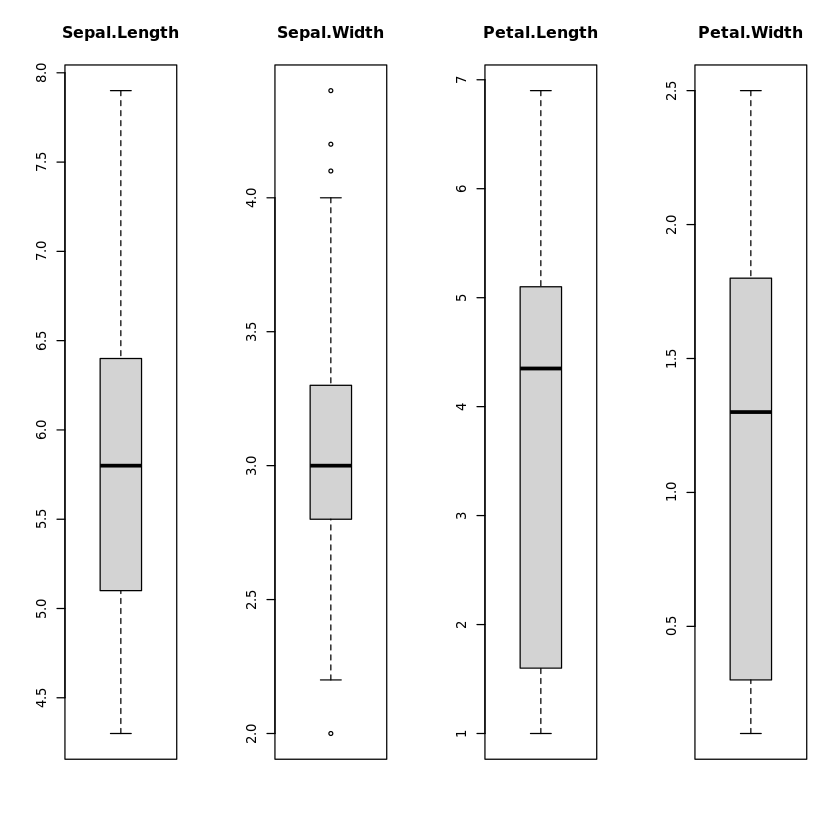

In [12]:
# Ensure 'iris' dataset is loaded and check its structure
str(iris)

# Plot boxplots for each numeric attribute
par(mfrow = c(1, 4))  # Set up plotting layout

# Loop through numeric columns (1 to 4) in iris dataset
for (i in 1:4) {
  boxplot(iris[[i]], main = names(iris)[i])  # Plot boxplot for each column
}

[1] TRUE

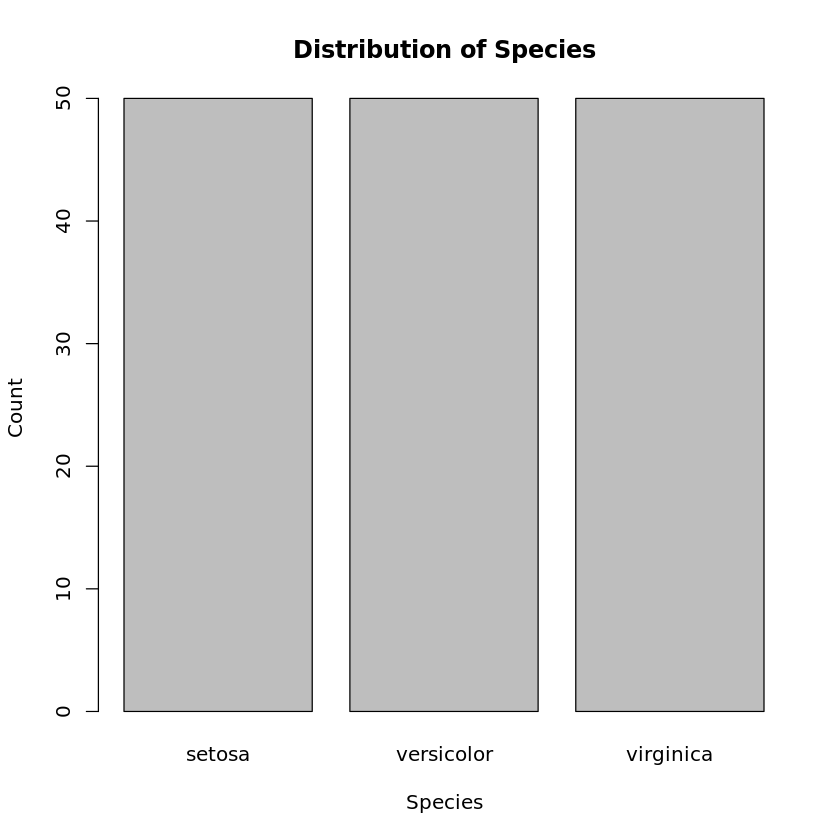

In [13]:
# Load the iris dataset (built-in dataset in R)
data(iris)

# Split input (x) and output (y)
x <- iris[, 1:4]  # Selecting columns 1 to 4 as predictors
y <- iris[, 5]    # Selecting column 5 (Species) as the response variable

# Check if y exists
exists("y")

# Plotting y (bar plot for categorical variable y)
if (exists("y")) {
  barplot(table(y), main = "Distribution of Species", xlab = "Species", ylab = "Count")
} else {
  print("Variable 'y' does not exist or is not correctly defined.")
}

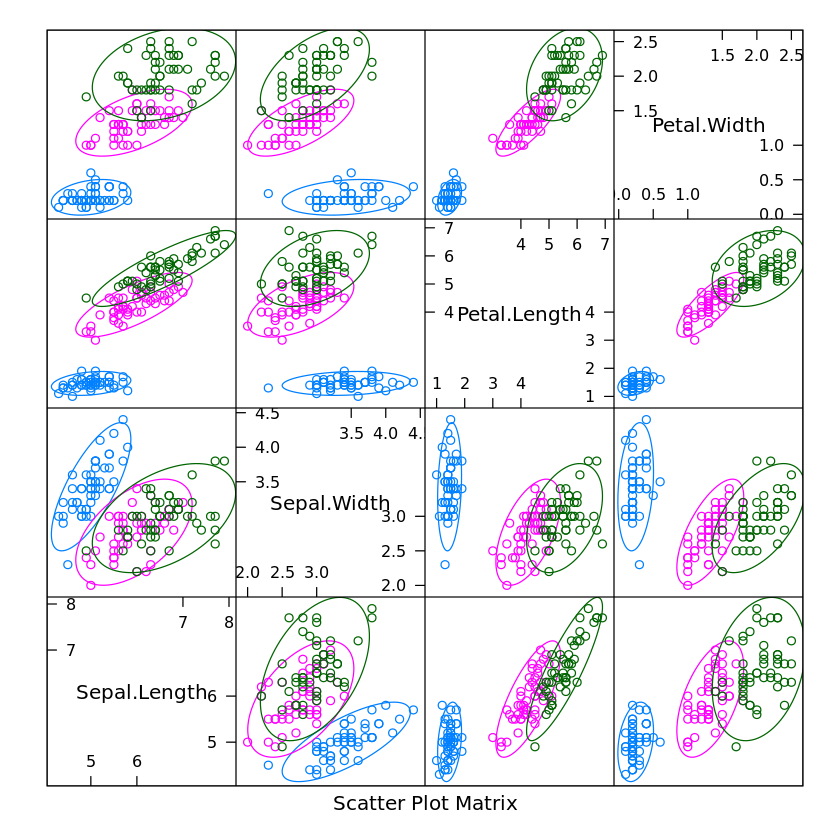

In [14]:
# Load necessary library and data (if not already loaded)
library(caret)
data(iris)

# Subset relevant columns from iris dataset
x <- iris[, 1:4]  # Assuming first 4 columns are numeric predictors
y <- iris$Species  # Species column as the response variable (factor)

# Ensure y is a factor (class labels)
y <- as.factor(y)

# Check for and handle missing values if necessary
if (anyNA(x)) {
  x <- na.omit(x)
  y <- y[complete.cases(x)]
}

# Generate scatterplot matrix with ellipses using featurePlot
featurePlot(x = x, y = y, plot = "ellipse")

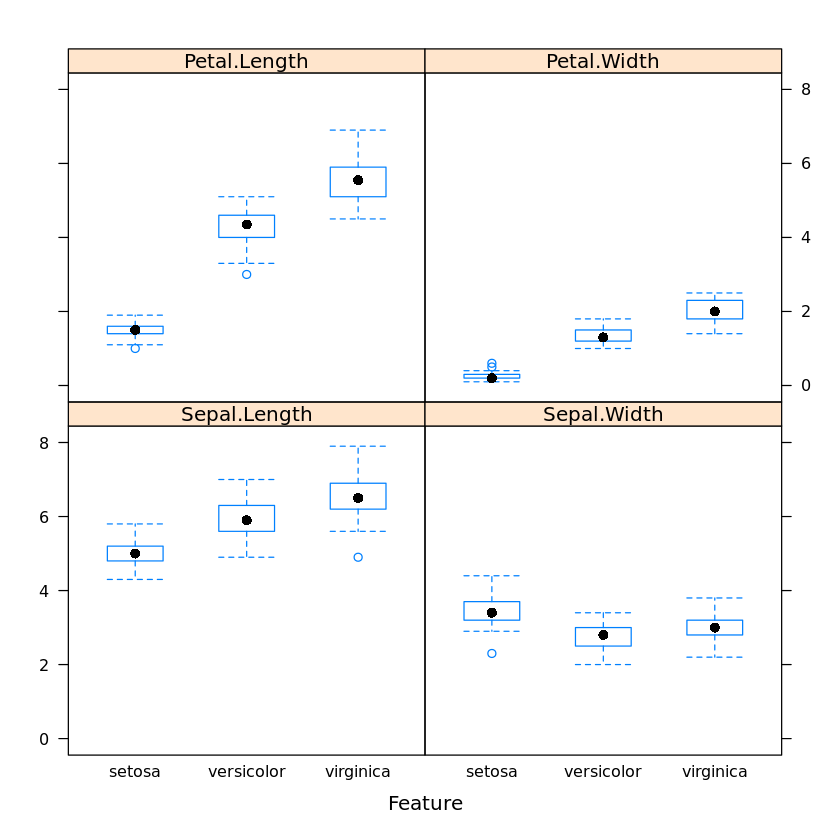

In [15]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

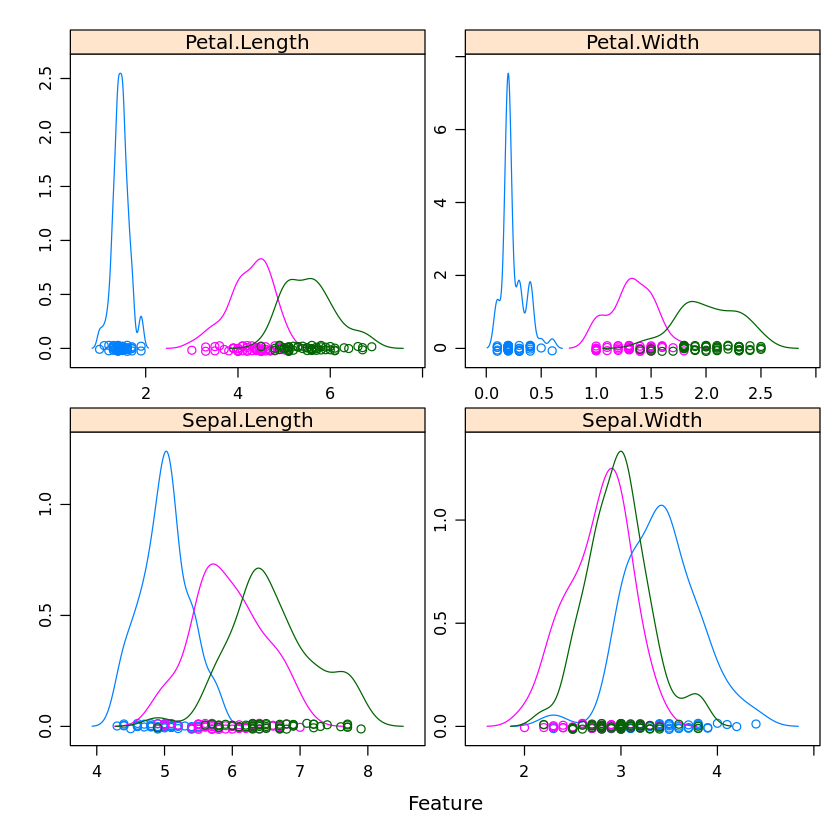

In [16]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

### **Evaluate Some Algorithms**

In [17]:
library(caret)
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [18]:
# Load necessary libraries
library(caret)

# Load the iris dataset
dataset <- iris

# Ensure Species is a factor
dataset$Species <- as.factor(dataset$Species)

# Print the structure of the dataset to verify
str(dataset)

# Define the control method
control <- trainControl(method="cv", number=10)  # 10-fold cross-validation
metric <- "Accuracy"  # Evaluation metric

# a) Linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)

# b) Nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)

# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)

# c) Advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)

# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

# Print model summaries
print(fit.lda)
print(fit.cart)
print(fit.knn)
print(fit.svm)
print(fit.rf)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
Linear Discriminant Analysis 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results:

  Accuracy  Kappa
  0.98      0.97 

CART 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa
  0.00  0.9400000  0.91 
  0.44  0.8400000  0.76 
  0.50  0.3

In [19]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.9333333 0.9500000 1.0000000 0.9800000 1.0000000    1    0
cart 0.8666667 0.9333333 0.9333333 0.9400000 0.9833333    1    0
knn  0.8666667 0.9333333 1.0000000 0.9666667 1.0000000    1    0
svm  0.8000000 0.9333333 0.9666667 0.9466667 1.0000000    1    0
rf   0.8666667 0.9333333 0.9666667 0.9600000 1.0000000    1    0

Kappa 
     Min. 1st Qu. Median Mean 3rd Qu. Max. NA's
lda   0.9   0.925   1.00 0.97   1.000    1    0
cart  0.8   0.900   0.90 0.91   0.975    1    0
knn   0.8   0.900   1.00 0.95   1.000    1    0
svm   0.7   0.900   0.95 0.92   1.000    1    0
rf    0.8   0.900   0.95 0.94   1.000    1    0


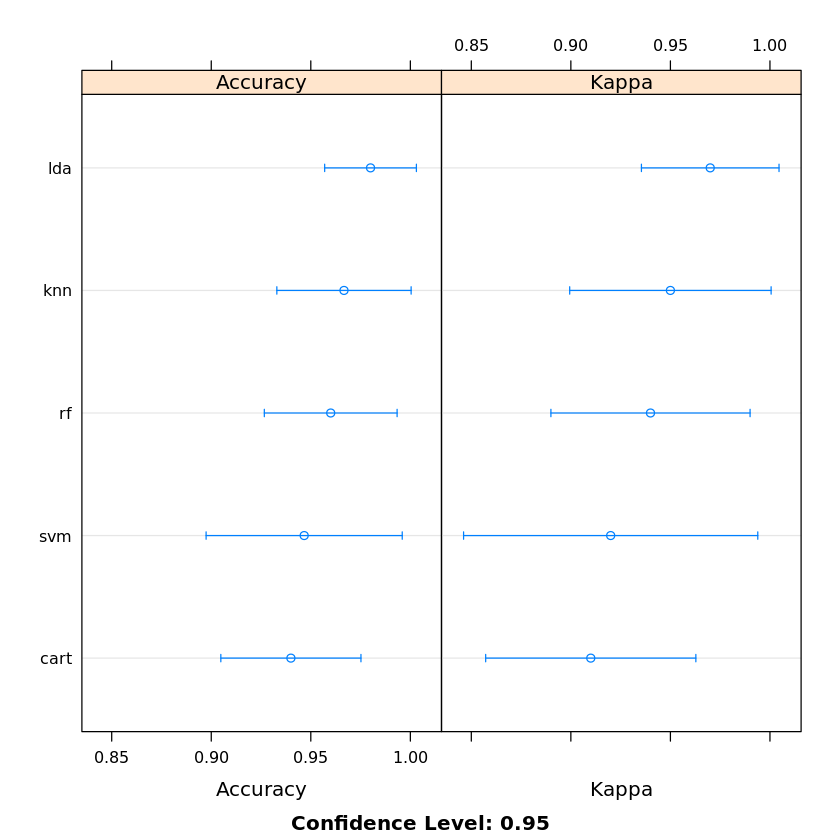

In [20]:
# compare accuracy of models
dotplot(results)

In [21]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results:

  Accuracy  Kappa
  0.98      0.97 



### **Make Predictions**

In [23]:
# Load necessary libraries
library(caret)
library(ggplot2)

# Load the iris dataset
dataset <- iris

# Ensure Species is a factor
dataset$Species <- as.factor(dataset$Species)

# Ensure predictor columns are numeric
dataset[, 1:4] <- lapply(dataset[, 1:4], as.numeric)

# Split the dataset into training and validation sets
set.seed(7)
trainIndex <- createDataPartition(dataset$Species, p=0.8, list=FALSE)
train <- dataset[trainIndex, ]
validation <- dataset[-trainIndex, ]

# Ensure consistent data types
train[, 1:4] <- lapply(train[, 1:4], as.numeric)
validation[, 1:4] <- lapply(validation[, 1:4], as.numeric)
train$Species <- as.factor(train$Species)
validation$Species <- as.factor(validation$Species)

# Define the control method
control <- trainControl(method="cv", number=10)  # 10-fold cross-validation
metric <- "Accuracy"  # Evaluation metric

# a) Linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=train, method="lda", metric=metric, trControl=control)

# b) Nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=train, method="rpart", metric=metric, trControl=control)

# kNN
set.seed(7)
fit.knn <- train(Species~., data=train, method="knn", metric=metric, trControl=control)

# c) Advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=train, method="svmRadial", metric=metric, trControl=control)

# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=train, method="rf", metric=metric, trControl=control)

# Print model summaries
print(fit.lda)
print(fit.cart)
print(fit.knn)
print(fit.svm)
print(fit.rf)

# Estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa 
  0.975     0.9625

CART 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa
  0.0000  0.9166667  0.875
  0.4375  0.8166667  0.725
  0.5000  0.3333333  0.000

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.
k-Nearest Neighbors 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results across

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            